# Analysis of the continuum spectra emitted by 3 different galaxies

### Assumptions: 
1) The continuum part of the spectra is due only to stars.

2) The emission spectra of stars is a black body spectra.

3) The initial mass function is given by the following relation: $I.M.F. = \frac{dN}{dM} \propto M^{-2.35}$

4) All the star are born at the same time

In [1]:
import numpy as np
from tqdm.notebook import tqdm
import astropy.constants as const
import pylab as plt
from astropy.modeling import models
from astropy import units as u
from astropy.visualization import quantity_support

In [2]:
import numpy as np
import scipy.stats
import pylab as plt
import math
from scipy.stats import norm
import astropy
from astropy.modeling import models
from astropy import units as u
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

In [36]:
M_sun = const.M_sun.cgs.value

# Functions:

In [37]:
def Properties(M):
    L_sun = const.L_sun.cgs.value
    R_sun = const.R_sun.cgs.value
    sigma = const.sigma_sb.cgs.value
    
    if(M.any()>=1.2*M_sun):
        R_M_relation = 0.56 #CNO
    
    else:
        R_M_relation = 0.43 #pp chain
   
    R = R_sun*((M/M_sun)**(R_M_relation))
    
    L_M_relation = 3.5
    L = L_sun*((M/M_sun)**(L_M_relation))*(u.erg/u.s)
    
    Temp = (L / (4*(math.pi)*(R**2*(u.cm**2))*sigma*(u.erg/((u.K**4)*(u.cm**2)*u.s))))**(1/4)
    
    numb_stars = (M/M_sun)**(-2.35)
    S = 4*(math.pi)*((R/R_sun)**2)
    scale_factor = numb_stars*S
    
    
    return Temp, scale_factor

def max_mass (t):
    t_sun = (10**10)*u.yr #age of the sun
    mass_max = ((t_sun/t).value)**(1/2.5)
    return mass_max


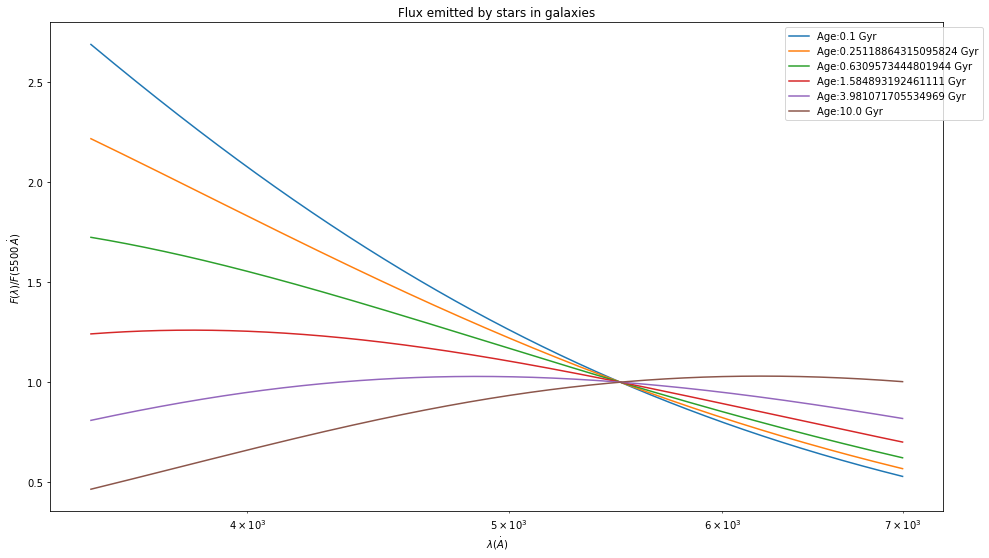

In [38]:
time = np.logspace(8, 10, 6)*u.yr
mass_max = max_mass(time)

plt.figure(figsize=(16,9))
for i in range(0, len(time)):
    Mass = np.linspace(0.1, mass_max[i], 100) #choosing step=1 we have dM=const=1 in I.M.F
    Mass = Mass*M_sun 

    Temp, scale_factor = Properties(Mass)

    bb =  np.sum([models.BlackBody(temperature=Temperature, scale=S_F *(u.erg/(u.cm**2 * u.AA * u.s * u.sr))) for Temperature, S_F in zip(Temp, scale_factor)])

    wav = np.arange(3500, 7000) * u.AA
    flux = bb(wav)/bb(5500*u.AA)
    
    with quantity_support():
        #plt.ylim(0, 6)
        plt.semilogx(wav, flux, label='Age:{} Gyr'.format(time[i]/((10**9)*u.yr)))
        plt.title("Flux emitted by stars in galaxies")
        plt.legend(bbox_to_anchor=(1.05,1))
        plt.ylabel("$F(\lambda) / F(5500 \, \dot{A})$")
        plt.xlabel("$\lambda(\dot{A})$")

plt.show()

In [ ]:
def obs_Flux (int_Flux, wave):
    A_lambda = k